### Import des bibliothèques, modules et chargement des datasets

In [1]:
# Import de bibliothèques nécessaire à l'étude : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# On charge les datasets
freq = pd.read_csv('frequentation.csv')
menus = pd.read_csv('menus.csv')

In [3]:
# Afficher toutes les colonnes 
pd.set_option('display.max_columns', None)
# Afficher toutes les lignes 
pd.set_option('display.max_rows', None)
# Définir la largeur d'affichage maximale
pd.set_option('display.max_colwidth', None)

### Nettoyage

In [4]:
# Combinaison des deux dataframes
merged_df = pd.merge(freq, menus, on='date')
merged_df_copie = merged_df

Supprimer les colonnes inutiles

In [5]:
# Recherche des mercredis, jour de garderie
merged_df_mercredi = merged_df.loc[merged_df['jour'] == 'Mercredi']
# Suppresion des mercredis
merged_df = merged_df.drop(merged_df[merged_df['jour'] == 'Mercredi'].index)

In [6]:
# Suppression des colonnes Unnamed liées au merge: 0_x et Unnamed: 0_y
merged_df = merged_df.drop(columns='Unnamed: 0_x')
merged_df = merged_df.drop(columns='Unnamed: 0_y')

In [7]:
# Suppression des colonnes inutiles : 
merged_df = merged_df.drop(columns='greves') # La grève est un élément difficile à anticiper
merged_df = merged_df.drop(columns='semaine') # Doublon avec date
merged_df = merged_df.drop(columns='mois') # Doublon avec date

In [8]:
# Ajout d'une colonne frequentation = nb de repas / par effectif total
merged_df['frequentation'] = merged_df['reel'] / merged_df['effectif']

In [9]:
# Suppresion des menus non déclarés
df_filtered = merged_df[(merged_df['porc'] == 0) & (merged_df['viande'] == 0) & (merged_df['poisson'] == 0) & (merged_df['bio'] == 0) & (merged_df['noel'] == 0) & (merged_df['menu'] == '[]')]
merged_df = merged_df.drop(df_filtered.index)

In [239]:
# Supprimer toutes les valeurs aberrantes inférieur à  0.7
merged_df = merged_df.loc[merged_df['frequentation'] > 0.7]
# Supprimer toutes les reels égale à 0
merged_df = merged_df.loc[merged_df['reel'] != 0]

Gérer les valeurs manquantes

In [11]:
# Recherche d'élements manquants dans le Dataframe
merged_df.isna().sum()
# Recherche d'élements nuls dans le Dataframe
merged_df.isnull().sum()

date               0
annee_scolaire     0
jour               0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
menu               0
porc               0
viande             0
poisson            0
bio                0
noel               0
frites             0
an_chinois         0
frequentation      0
dtype: int64

In [240]:
# Changement de format sur la colonne date pour créer différentes colonnes adpatées a
# chaque format : année, mois, jour
merged_df['date'] = pd.to_datetime(merged_df['date'])
# Extraire les informations de date
merged_df['année'] = merged_df['date'].dt.year
merged_df['mois'] = merged_df['date'].dt.month
merged_df['nb_jour'] = merged_df['date'].dt.day
# Supprimer la colonne de date originale si nécessaire
merged_df = merged_df.drop('date', axis=1)

KeyError: 'date'

### Analyse univariée

In [13]:
# vérifier s'il n'y a qu'une seule valeur unique dans une colonne
# Appliquer nunique() à chaque colonne
nombre_uniques = merged_df.apply(pd.Series.nunique)

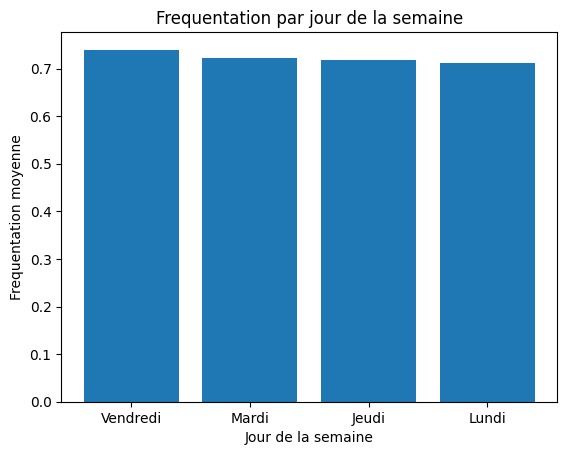

In [14]:
# Créer un graphique barre pour la fréquentation par jour de la semaine
frequentation_by_day = merged_df.groupby('jour')['frequentation'].mean().sort_values(ascending=False)
plt.bar(frequentation_by_day.index, frequentation_by_day)
plt.xlabel('Jour de la semaine')
plt.ylabel('Frequentation moyenne')
plt.title('Frequentation par jour de la semaine')
plt.show()

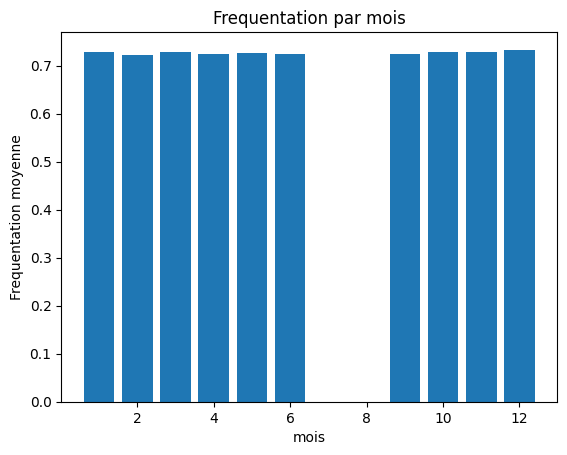

In [15]:
# Créer un graphique barre pour la fréquentation par jour de la semaine
frequentation_by_day = merged_df.groupby('mois')['frequentation'].mean().sort_values(ascending=False)
plt.bar(frequentation_by_day.index, frequentation_by_day)
plt.xlabel('mois')
plt.ylabel('Frequentation moyenne')
plt.title('Frequentation par mois')
plt.show()

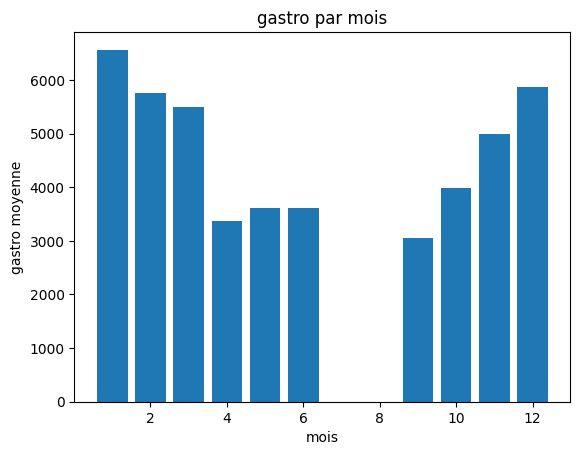

In [16]:
# Créer un graphique barre pour la gastro en fonction du mois
gastro_by_month = merged_df.groupby('mois')['inc_gastro'].mean().sort_values(ascending=False)
plt.bar(gastro_by_month.index, gastro_by_month)
plt.xlabel('mois')
plt.ylabel('gastro moyenne')
plt.title('gastro par mois')
plt.show()

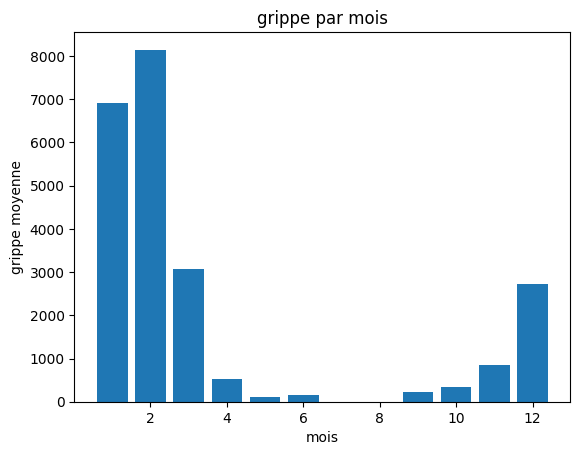

In [17]:
# Créer un graphique barre pour la gastro en fonction du mois
gastro_by_month = merged_df.groupby('mois')['inc_grippe'].mean().sort_values(ascending=False)
plt.bar(gastro_by_month.index, gastro_by_month)
plt.xlabel('mois')
plt.ylabel('grippe moyenne')
plt.title('grippe par mois')
plt.show()

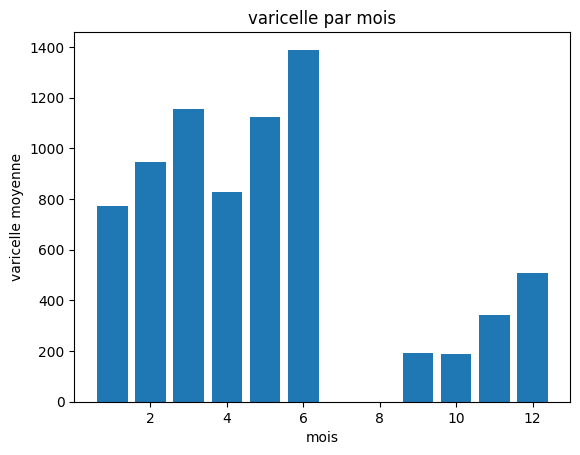

In [18]:
# Créer un graphique barre pour la gastro en fonction du mois
gastro_by_month = merged_df.groupby('mois')['inc_varicelle'].mean().sort_values(ascending=False)
plt.bar(gastro_by_month.index, gastro_by_month)
plt.xlabel('mois')
plt.ylabel('varicelle moyenne')
plt.title('varicelle par mois')
plt.show()

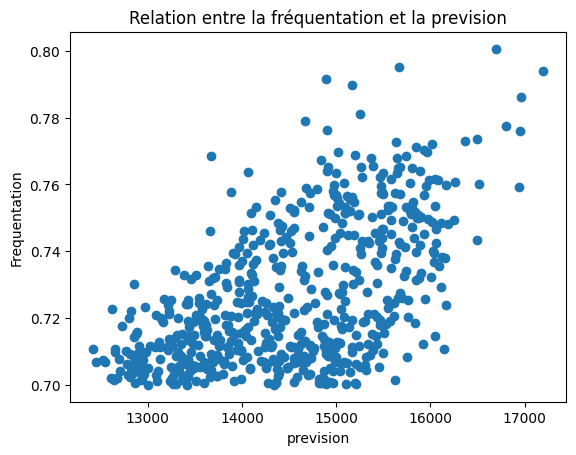

In [19]:
# Vérifier la relation entre la fréquentation et la prévision
import matplotlib.pyplot as plt

plt.scatter(merged_df['prevision'], merged_df['frequentation'])
plt.xlabel('prevision')
plt.ylabel('Frequentation')
plt.title('Relation entre la fréquentation et la prevision')
plt.show()

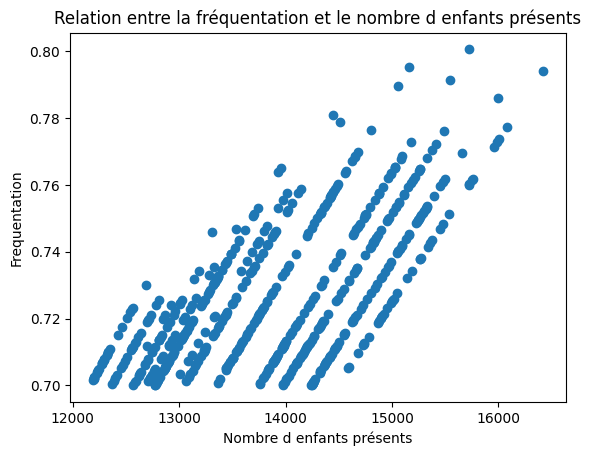

In [20]:
# Vérifier la relation entre la fréquentation et le nombre d'enfants présents
import matplotlib.pyplot as plt

plt.scatter(merged_df['reel'], merged_df['frequentation'])
plt.xlabel('Nombre d enfants présents')
plt.ylabel('Frequentation')
plt.title('Relation entre la fréquentation et le nombre d enfants présents')
plt.show()

### Analyse multivariée

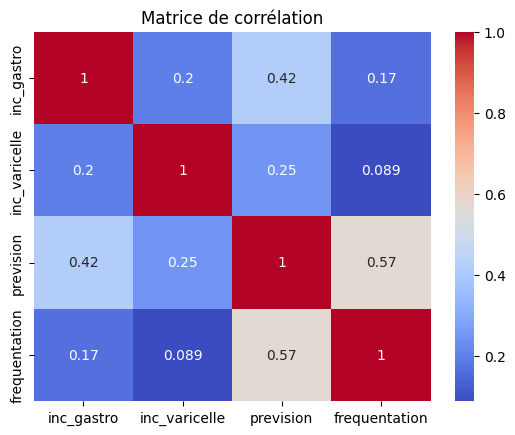

In [21]:
# Matrice de corrélations de variables à valeurs numériques
import seaborn as sns

numeric_variables = ['inc_gastro', 'inc_varicelle', 'prevision', 'frequentation']
corr_matrix = merged_df[numeric_variables].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [22]:
# Identifier la corrélations des variables avec la valeur reel avec la méthode Anova (quali/quanti)

import pandas as pd
from scipy.stats import f_oneway

valeurs_a_tester_quanti = ['nb_jour', 'année', 'mois', 'ferie',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'effectif', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois']

# Création d'une liste pour stocker les résultats
resultats_ordonnes = []

# Application de l'ANOVA pour chaque élément de la liste
for colonne in valeurs_a_tester_quanti:
    # Création d'une liste pour stocker les groupes de scores
    resultats = []
    
    # Groupement par la colonne en cours
    for group, scores in merged_df.groupby(colonne)['reel']:
        # Vérification si le groupe contient au moins deux échantillons
        if len(scores) >= 2:
            resultats.append(scores)
    
    # Vérification si au moins deux groupes sont présents
    if len(resultats) >= 2:
        # Calcul de l'ANOVA
        f_value, p_value = f_oneway(*resultats)
        
        # Ajout des résultats à la liste
        resultats_ordonnes.append((colonne, f_value, p_value))

# Tri des résultats en fonction de la P-value (indice 2)
resultats_ordonnes = sorted(resultats_ordonnes, key=lambda x: x[2])

# Affichage des résultats dans l'ordre croissant de la P-value
for colonne, f_value, p_value in resultats_ordonnes:
    print("Colonne :", colonne)
    print("Valeur F :", f_value)
    print("P-value :", "{:.10f}".format(p_value))
    print()


Colonne : effectif
Valeur F : 226.6300218243717
P-value : 0.0000000000

Colonne : année
Valeur F : 282.39988903721644
P-value : 0.0000000000

Colonne : inc_gastro
Valeur F : 8.584810659837435
P-value : 0.0000000000

Colonne : inc_grippe
Valeur F : 5.245535126397772
P-value : 0.0000000000

Colonne : inc_varicelle
Valeur F : 3.974436316301577
P-value : 0.0000000000

Colonne : prevision
Valeur F : 11.261663698800453
P-value : 0.0000000000

Colonne : viande
Valeur F : 31.61468258975195
P-value : 0.0000000288

Colonne : bio
Valeur F : 31.277323226717385
P-value : 0.0000000339

Colonne : porc
Valeur F : 16.01276590974027
P-value : 0.0000707466

Colonne : ramadan
Valeur F : 11.702801033952847
P-value : 0.0006662566

Colonne : mois
Valeur F : 2.8569958530785806
P-value : 0.0026366607

Colonne : poisson
Valeur F : 7.387978370507561
P-value : 0.0067549265

Colonne : noel
Valeur F : 4.346121087385656
P-value : 0.0375134870

Colonne : vacances
Valeur F : 1.4747078806741303
P-value : 0.2250797167



In [23]:
# Passage format string to false true
merged_df = pd.get_dummies(merged_df, columns=['jour'])

In [243]:
# Calcul R² score et choix (test) des features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
reg_multi = smf.ols('reel~jour_Lundi+jour_Vendredi+mois+effectif+viande+poisson+bio+noel+année+inc_grippe+inc_varicelle+porc+ramadan', data=merged_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     522.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          6.74e-314
Time:                        16:13:49   Log-Likelihood:                -4210.0
No. Observations:                 605   AIC:                             8448.
Df Residuals:                     591   BIC:                             8510.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -5.304e+

### Jeux de données et features

In [25]:
# On observe les jours avec un pic d'influence sont les jours de noel et ceux ou la condition bio et viande ou poisson sont remplis
# Création d'une feature bio+poisson
# Créer la colonne 'bio+poisson'
merged_df['bio&poisson'] = merged_df['bio'] & merged_df['poisson']
# Création d'une feature bio+viande
# Créer la colonne 'bio+poisson'
merged_df['bio&viande'] = merged_df['bio'] & merged_df['viande']

In [187]:
# Séparer les variables indépendantes (X) et la variable cible (y)
X = merged_df[['jour_Lundi', 'jour_Mardi', 'jour_Jeudi', 'jour_Vendredi', 'mois', 'effectif', 'viande', 'poisson', 'noel', 'bio', 'année', 'inc_grippe', 'inc_varicelle', 'porc', 'bio&viande', 'bio&poisson', 'ramadan']]
y = merged_df['reel']

In [188]:
# Passage false true à booléan
X['jour_Lundi'] = X['jour_Lundi'].astype(int)
X['jour_Mardi'] = X['jour_Mardi'].astype(int)
X['jour_Jeudi'] = X['jour_Jeudi'].astype(int)
X['jour_Vendredi'] = X['jour_Vendredi'].astype(int)

C:\Users\Leo\AppData\Local\Temp\ipykernel_5264\284893677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['jour_Lundi'] = X['jour_Lundi'].astype(int)
C:\Users\Leo\AppData\Local\Temp\ipykernel_5264\284893677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['jour_Mardi'] = X['jour_Mardi'].astype(int)
C:\Users\Leo\AppData\Local\Temp\ipykernel_5264\284893677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [189]:
from sklearn.model_selection import train_test_split

# Sélectionner les indices des lignes correspondant aux années jusqu'à 2018-2019
train_indices = merged_df[merged_df['annee_scolaire'] <= '2018-2019'].index

# Sélectionner les indices des lignes correspondant à l'année 2019-2020
test_indices = merged_df[merged_df['annee_scolaire'] == '2019-2020'].index

# Diviser les données en un ensemble d'entraînement et un ensemble de test en utilisant les indices
X_train = X.loc[train_indices]
y_train = y.loc[train_indices]
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

### Modèle Regression Linéaire

In [190]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle de régression linéaire
model = LinearRegression()

In [191]:
# Ajuster le modèle aux données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [192]:
# Obtenir les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
pd.DataFrame(y_pred).describe()

,0
count,39.000000
mean,15167.110955
std,279.516240
min,14687.813607
25%,14994.227134
50%,15024.334752
75%,15495.963702
max,15611.282243


In [193]:
from sklearn.metrics import r2_score

# Calculer le coefficient de détermination (R² score)
r2 = r2_score(y_test, y_pred)
r2

0.590891564789854

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

293.0424735413836

In [195]:
# Calculer l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae

216.24957660032072

In [196]:
# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(y_pred, columns=['pred'])

# Filtrer les données réelles sur l'année 2019-2020
df_reel_2019_2020 = merged_df[merged_df['annee_scolaire'] == '2019-2020'][['reel']]

# Filtrer les données réelles sur l'année 2019-2020
df_prev_2019_2020 = merged_df[merged_df['annee_scolaire'] == '2019-2020'][['prevision']]

In [197]:
reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,15186,15742,15576.739564,556,390.739564
1,14681,15170,14955.629891,489,274.629891
2,15003,15536,15149.150248,533,146.150248
3,15477,16192,15572.966161,715,95.966161
4,15262,15621,15276.867933,359,14.867933
5,14780,15426,14984.980460,646,204.980460
6,15720,16169,15535.645194,449,-184.354806
7,14741,15028,14692.716986,287,-48.283014
8,14921,15341,14993.825229,420,72.825229
9,15750,15982,15482.981922,232,-267.018078


In [198]:
df_differences = pd.DataFrame(df_differences)
df_differences.describe()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15238.564103,15854.641026,15167.110955,616.076923,-71.453148
std,464.143058,451.881359,279.516240,251.783887,287.912871
min,14590.000000,15028.000000,14687.813607,-107.000000,-927.819601
25%,14899.500000,15558.000000,14994.227134,468.500000,-246.326191
50%,15143.000000,15765.000000,15024.334752,646.000000,14.867933
75%,15508.000000,16092.500000,15495.963702,745.500000,118.321217
max,16423.000000,17201.000000,15611.282243,1192.000000,390.739564


### Modèle Ridge (meilleur modele)

In [216]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [217]:
ridge_model = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha selon vos besoins

In [228]:
# Crossvalidation
from sklearn.model_selection import GridSearchCV

# Définir une grille de recherche d'hyperparamètres
param_grid = {'alpha': [1.0]}

# Initialiser le modèle Ridge
ridge_model = Ridge()

# Utiliser GridSearchCV pour rechercher les meilleures combinaisons d'hyperparamètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Exécuter la recherche sur les données d'entraînement
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [1.0]},
             scoring='neg_mean_squared_error')

In [229]:
# Obtenir les meilleurs hyperparamètres et le meilleur modèle :
best_params = grid_search.best_params_
best_score = grid_search.best_estimator_

In [230]:
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

Meilleurs paramètres :  {'alpha': 1.0}
Meilleur score :  -102163.3342631481


In [231]:
y_pred = best_score.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [232]:
ridge_model.fit(X_train, y_train)

Ridge()

In [233]:
y_pred = ridge_model.predict(X_test)

In [234]:
# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(y_pred, columns=['pred'])

# Filtrer les données réelles sur l'année 2019-2020
df_reel_2019_2020 = merged_df[merged_df['annee_scolaire'] == '2019-2020'][['reel']]

# Filtrer les données réelles sur l'année 2019-2020
df_prev_2019_2020 = merged_df[merged_df['annee_scolaire'] == '2019-2020'][['prevision']]

In [235]:
reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,15186,15742,15573.644313,556,387.644313
1,14681,15170,14957.427544,489,276.427544
2,15003,15536,15159.289467,533,156.289467
3,15477,16192,15569.994411,715,92.994411
4,15262,15621,15266.678814,359,4.678814
5,14780,15426,14986.557553,646,206.557553
6,15720,16169,15530.568660,449,-189.431340
7,14741,15028,14702.691420,287,-38.308580
8,14921,15341,14994.581383,420,73.581383
9,15750,15982,15471.103531,232,-278.896469


In [236]:
df_differences = pd.DataFrame(df_differences)
df_differences.describe()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15238.564103,15854.641026,15168.281080,616.076923,-70.283023
std,464.143058,451.881359,275.067430,251.783887,288.258646
min,14590.000000,15028.000000,14698.350401,-107.000000,-930.650035
25%,14899.500000,15558.000000,14997.042934,468.500000,-244.227734
50%,15143.000000,15765.000000,15023.349965,646.000000,4.678814
75%,15508.000000,16092.500000,15485.168845,745.500000,117.355613
max,16423.000000,17201.000000,15609.520984,1192.000000,387.644313


### Modèle Lasso

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [50]:
# Définir les hyperparamètres à optimiser
param_grid = {'alpha': [0.1, 1.0, 10.0]}

In [51]:
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1.0, 10.0]})

In [53]:
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

Meilleurs paramètres :  {'alpha': 0.1}
Meilleur score :  0.2415818644499585


In [54]:
lasso_best = grid_search.best_estimator_
y_pred = lasso_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne : ", mse)

Erreur quadratique moyenne :  85915.74168247788


In [55]:
y_pred = lasso_best.predict(X_test)

In [56]:
# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(y_pred, columns=['pred'])

In [57]:
reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,15186,15742,15576.815413,556,390.815413
1,14681,15170,14955.485642,489,274.485642
2,15003,15536,15154.401665,533,151.401665
3,15477,16192,15573.053013,715,96.053013
4,15262,15621,15272.275994,359,10.275994
5,14780,15426,14985.855798,646,205.855798
6,15720,16169,15534.212378,449,-185.787622
7,14741,15028,14695.607766,287,-45.392234
8,14921,15341,14994.592004,420,73.592004
9,15750,15982,15478.462506,232,-271.537494


In [58]:
df_differences = pd.DataFrame(df_differences)
df_differences.describe()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15238.564103,15854.641026,15167.006211,616.076923,-71.557892
std,464.143058,451.881359,278.392533,251.783887,287.960760
min,14590.000000,15028.000000,14690.781276,-107.000000,-927.779320
25%,14899.500000,15558.000000,14993.638333,468.500000,-247.416363
50%,15143.000000,15765.000000,15025.012665,646.000000,10.275994
75%,15508.000000,16092.500000,15491.419154,745.500000,118.538004
max,16423.000000,17201.000000,15611.196795,1192.000000,390.815413


### Modèle KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [60]:
knn = KNeighborsClassifier()

In [61]:
param_grid = {'n_neighbors': [ 5], 'weights': ['uniform', 'distance']}

In [62]:
grid_search = GridSearchCV(knn, param_grid, cv=3)

In [63]:
grid_search.fit(X_train, y_train)

C:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.pr

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5],
                         'weights': ['uniform', 'distance']})

In [64]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [65]:
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

Meilleurs paramètres :  {'n_neighbors': 5, 'weights': 'distance'}
Meilleur score :  0.0


In [66]:
y_pred = best_model.predict(X_test)

In [67]:
# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(y_pred, columns=['pred'])
reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,15186,15742,15328,556,142
1,14681,15170,14323,489,-358
2,15003,15536,14323,533,-680
3,15477,16192,14323,715,-1154
4,15262,15621,14671,359,-591
5,14780,15426,14860,646,80
6,15720,16169,14323,449,-1397
7,14741,15028,14261,287,-480
8,14921,15341,14261,420,-660
9,15750,15982,14930,232,-820


In [68]:
df_differences = pd.DataFrame(df_differences)
df_differences.describe()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15238.564103,15854.641026,14729.179487,616.076923,-509.384615
std,464.143058,451.881359,393.474527,251.783887,542.477679
min,14590.000000,15028.000000,14255.000000,-107.000000,-1666.000000
25%,14899.500000,15558.000000,14328.000000,468.500000,-871.500000
50%,15143.000000,15765.000000,14729.000000,646.000000,-498.000000
75%,15508.000000,16092.500000,14860.000000,745.500000,-112.500000
max,16423.000000,17201.000000,15993.000000,1192.000000,1037.000000


### Modèle XGBoost

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

In [70]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [71]:
xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')

In [72]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [73]:
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)
print("Meilleurs hyperparamètres :", best_params)
print("Meilleur score RMSE :", best_score)

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Meilleur score RMSE : 397.4804800872869


In [74]:
best_xgb = XGBRegressor(**best_params)
best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [75]:
y_pred = best_xgb.predict(X_test)

In [76]:
# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(y_pred, columns=['pred'])
reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,15186,15742,15195.008789,556,9.008789
1,14681,15170,14383.729492,489,-297.270508
2,15003,15536,14822.007812,533,-180.992188
3,15477,16192,15159.688477,715,-317.311523
4,15262,15621,15008.350586,359,-253.649414
5,14780,15426,14511.812500,646,-268.187500
6,15720,16169,15133.722656,449,-586.277344
7,14741,15028,14228.263672,287,-512.736328
8,14921,15341,14376.362305,420,-544.637695
9,15750,15982,15041.441406,232,-708.558594


In [77]:
df_differences = pd.DataFrame(df_differences)
df_differences.describe()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15238.564103,15854.641026,14734.163086,616.076923,-504.401868
std,464.143058,451.881359,367.016083,251.783887,282.857711
min,14590.000000,15028.000000,14228.263672,-107.000000,-1415.765625
25%,14899.500000,15558.000000,14421.173828,468.500000,-624.737305
50%,15143.000000,15765.000000,14538.234375,646.000000,-492.650391
75%,15508.000000,16092.500000,15087.582031,745.500000,-303.561035
max,16423.000000,17201.000000,15383.014648,1192.000000,9.008789


### Modèle Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [79]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15]
}

In [80]:
rf = RandomForestClassifier(random_state=42)

In [81]:
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\Leo\anaconda3\envs\myenv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [82]:
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

Meilleurs hyperparamètres :  {'max_depth': 5, 'n_estimators': 300}


In [83]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print("Précision : ", accuracy)

Précision :  0.0


In [85]:
# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(y_pred, columns=['pred'])
reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,15186,15742,15247,556,61
1,14681,15170,14971,489,290
2,15003,15536,14413,533,-590
3,15477,16192,15247,715,-230
4,15262,15621,14971,359,-291
5,14780,15426,14246,646,-534
6,15720,16169,15090,449,-630
7,14741,15028,14254,287,-487
8,14921,15341,14246,420,-675
9,15750,15982,15247,232,-503


In [86]:
df_differences = pd.DataFrame(df_differences)
df_differences.describe()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15238.564103,15854.641026,14616.230769,616.076923,-622.333333
std,464.143058,451.881359,431.012606,251.783887,379.644940
min,14590.000000,15028.000000,13881.000000,-107.000000,-1708.000000
25%,14899.500000,15558.000000,14246.000000,468.500000,-781.000000
50%,15143.000000,15765.000000,14413.000000,646.000000,-630.000000
75%,15508.000000,16092.500000,15090.000000,745.500000,-430.500000
max,16423.000000,17201.000000,15247.000000,1192.000000,290.000000


### Conclusion

Pour conclure je proposerai d'utiliser le modèle de Regresson linéaire ou Ridge et d'ajouter environ + 300 à 500 repas pour pourmettre d'être souple. Pour les exceptions, prévoir 1000 repas congelés. Certaines dates ont un pic imprévisible (ou alors nous manquons de certaines informations). Je me pose encore la question pour comprendre le succes des Boulettes de boeuf* en tajine le 29/11/2019 pour lequel mes modèles ont une immense marge (sans devoir créer de feature qui feraient un biais)

In [245]:
merged_df.loc[merged_df['annee_scolaire'] == '2019-2020']

,annee_scolaire,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,frequentation,année,mois,nb_jour,jour_Jeudi,jour_Lundi,jour_Mardi,jour_Vendredi,bio&poisson,bio&viande
1142,2019-2020,0,0,0,0,0,0,0,0,0,0,0,2918,396,15742,15186,20685,"['Choux rouges bio°', 'Poisson meunière', 'Epinards à la crème', 'Carré bio°', 'Eclair au chocolat']",0,0,1,1,0,0,0,0.734155,2019,9,6,False,False,False,True,1,0
1144,2019-2020,0,0,0,0,0,0,0,0,0,0,593,5272,170,15170,14681,20685,"['Pastèque', 'Emincé de boeuf* thaï', 'Riz basmati', 'Fromage blanc bbc et miel']",0,1,0,0,0,0,0,0.709741,2019,9,10,False,False,True,False,0,0
1145,2019-2020,0,0,0,0,0,0,0,0,0,0,593,5272,170,15536,15003,20685,"['Gaspacho / croûtons', 'Tortilla aux pommes de terre', 'Salade verte', 'Fromage Chanteneige', 'Banane']",0,0,0,0,0,0,0,0.725308,2019,9,12,True,False,False,False,0,0
1146,2019-2020,0,0,0,0,0,0,0,0,0,0,593,5272,170,16192,15477,20685,"['Radis bio', 'Poisson', 'Pommes vapeur cube bio dÉs (rÉpartie)', 'Yaourt aromatisé']",0,0,1,1,0,0,0,0.748223,2019,9,13,False,False,False,True,1,0
1148,2019-2020,0,0,0,0,0,0,0,0,0,0,482,2851,340,15621,15262,20685,"['Betteraves aux dés de gruyère', 'Falafels bio aux pois chiches et patate douce sauce tomate', 'sauce tomate ', 'Riz basmati', 'Raisin']",0,0,0,1,0,0,0,0.737829,2019,9,17,False,False,True,False,0,0
1149,2019-2020,0,0,0,0,0,0,0,0,0,0,482,2851,340,15426,14780,20685,"['Mâche aux graines de tournesol bio', ""Poulet fermier d'Ancenis"", 'Carottes bio°', 'Biscuit petit beurre', 'Crème dessert chocolat bio°']",0,1,0,1,0,0,0,0.714527,2019,9,19,True,False,False,False,0,1
1150,2019-2020,0,0,0,0,0,0,0,0,0,0,482,2851,340,16169,15720,20685,"['Concombres', 'Poisson pané', 'Ratatouille', 'Camembert', 'Tarte au citron']",0,0,1,0,0,0,0,0.759971,2019,9,20,False,False,False,True,0,0
1151,2019-2020,0,0,0,0,0,0,0,0,0,0,119,3358,0,15028,14741,20685,"['Pizza au fromage', 'Paupiette de volaille forestiere', 'Purée de courge ""maison""', 'Cantal', 'Pomme bio°']",0,1,0,1,0,0,0,0.712642,2019,9,23,False,True,False,False,0,1
1152,2019-2020,0,0,0,0,0,0,0,0,0,0,119,3358,0,15341,14921,20685,"['Choux rouges bio°', 'Sauté de boeuf* fermier', 'Pommes rissolées', 'Flan caramel']",0,1,0,1,0,0,0,0.721344,2019,9,26,True,False,False,False,0,1
1153,2019-2020,0,0,0,0,0,0,0,0,0,0,119,3358,0,15982,15750,20685,"['Carottes râpées bio', 'Timbale de pätes bio au tofu fumé bio', 'Yaourt au citron BBC°']",0,0,0,1,0,0,0,0.761421,2019,9,27,False,False,False,True,0,0
